# Project 1 - Ryan Waterman

## Project Outline:

Your CEO has decided that the company needs a full-time data scientist, and possibly a team of them in the future. She thinks she needs someone who can help drive data science within then entire organization and could potentially lead a team in the future. She understands that data scientist salaries vary widely across the world and is unsure what to pay them. To complicate matters, salaries are going up due to the great recession and the market is highly competitive. Your CEO has asked you to prepare an analysis on data science salaries and provide them with a range to be competitive and get top talent. The position can work offshore, but the CEO would like to know what the difference is for a person working in the United States. Your company is currently a small company but is expanding rapidly. 

Prepare your analysis in an R file. Your final product should be a power point presentation giving your recommendation to the CEO. CEOs do not care about your code and don’t want to see it. They want to see visuals and a well thought out analysis. You will need to turn in the power point and the code as a flat R file. 

The metadata are as follows:

| Column | Description|
|---------|------------|
|work_year | The year the salary was paid.|
|experience_level | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director|
|employment_type| The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance|
|job_title | The role worked in during the year.|
|salary | The total gross salary amount paid.|
|salary_currency| The currency of the salary paid as an ISO 4217 currency code.|
|salaryinusd| The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).|
|employee_residence | Employee's primary country of residence in during the work year as an ISO 3166 country code.|
|remote_ratio | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)|
|company_location | The country of the employer's main office or contracting branch as an ISO 3166 country code.|
|company_size | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)|



In [387]:
!pip install pandas seaborn matplotlib plotnine numpy scipy

## Reading in and Understanding the Data

In [388]:
import pandas as pd

In [389]:
# First, let's read in the data and get a sense of what it looks like
data = pd.read_csv(r"original_data\r project data-1.csv")
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [390]:
# Looks like the CVS file already had an index column in it. Let's drop it.
data.drop(data.columns[0],axis=1,inplace=True)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [392]:
# The object dtypes all seem to contain categorical data. Let's convert them.
for col in data.columns:
    if data[f"{col}"].dtype == "object":
        categories = pd.unique(data[f"{col}"])
        data[f"{col}"] = pd.Categorical(data[f"{col}"], categories=categories)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    int64   
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   salary              607 non-null    int64   
 5   salary_currency     607 non-null    category
 6   salary_in_usd       607 non-null    int64   
 7   employee_residence  607 non-null    category
 8   remote_ratio        607 non-null    int64   
 9   company_location    607 non-null    category
 10  company_size        607 non-null    category
dtypes: category(7), int64(4)
memory usage: 31.8 KB


## Cursory Plots to Visualize Data

In [393]:
import seaborn as sns
import matplotlib.pyplot as plt

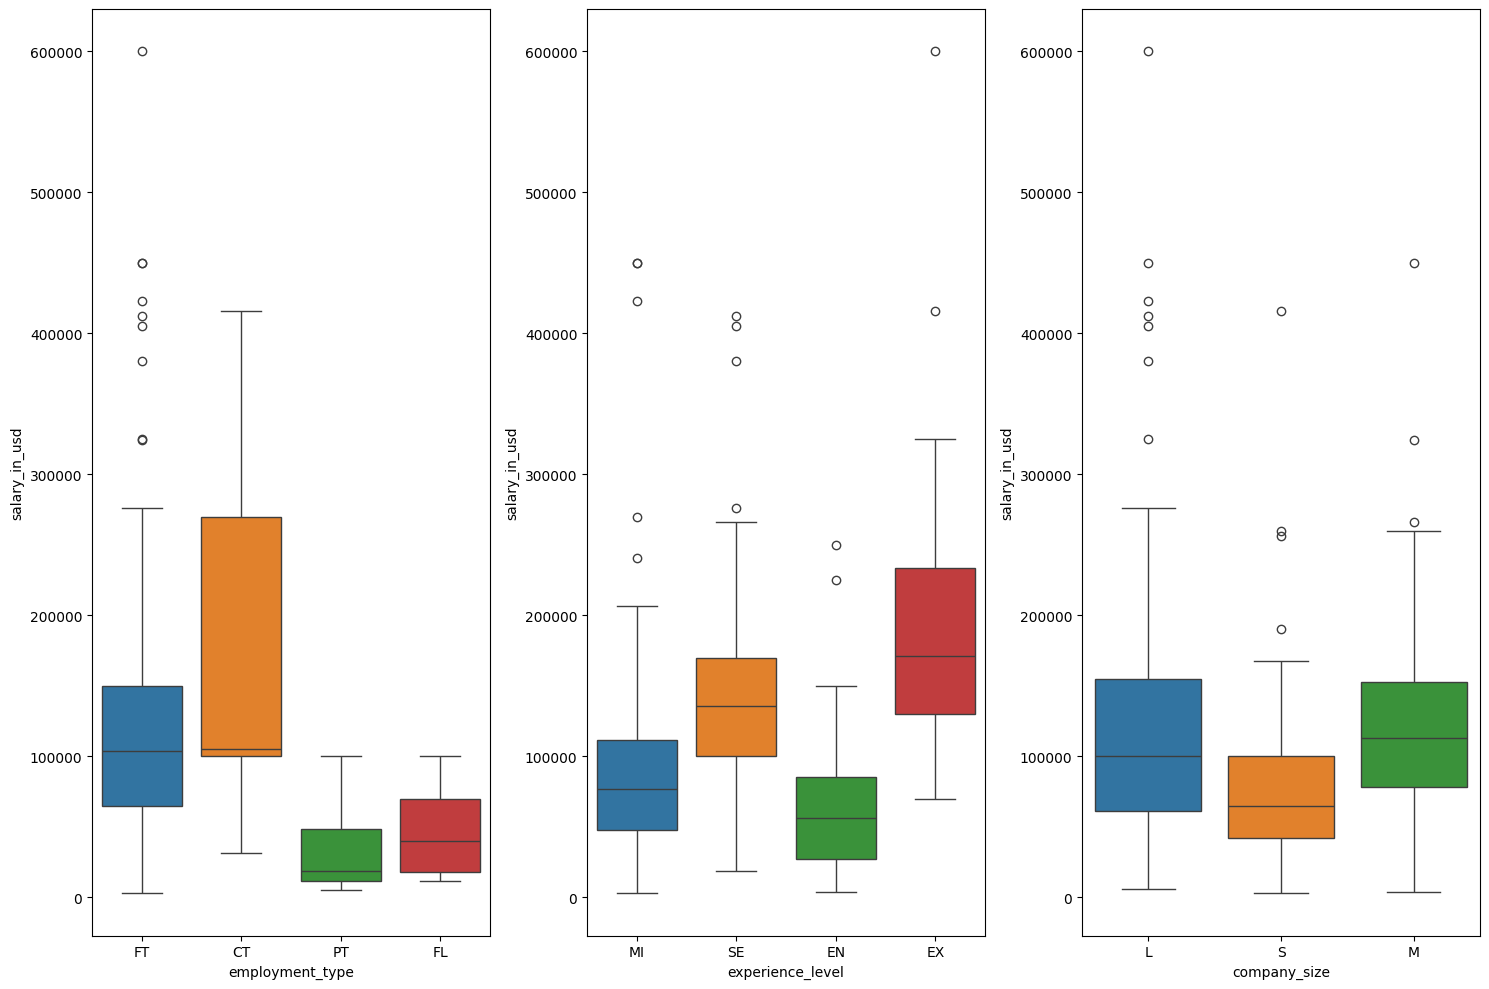

In [394]:
# I am curious about the relationship between some of the variables...
# Let's plot them

fig, axs = plt.subplots(nrows=1,ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

sns.boxplot(x=data["employment_type"],y=data["salary_in_usd"], hue=data["employment_type"], ax=axs[0])
sns.boxplot(x=data["experience_level"],y=data["salary_in_usd"], hue=data["experience_level"], ax=axs[1])
sns.boxplot(x=data["company_size"],y=data["salary_in_usd"], hue=data["company_size"], ax=axs[2])

plt.tight_layout()


There appear to be some interesting trends here... let's explore them

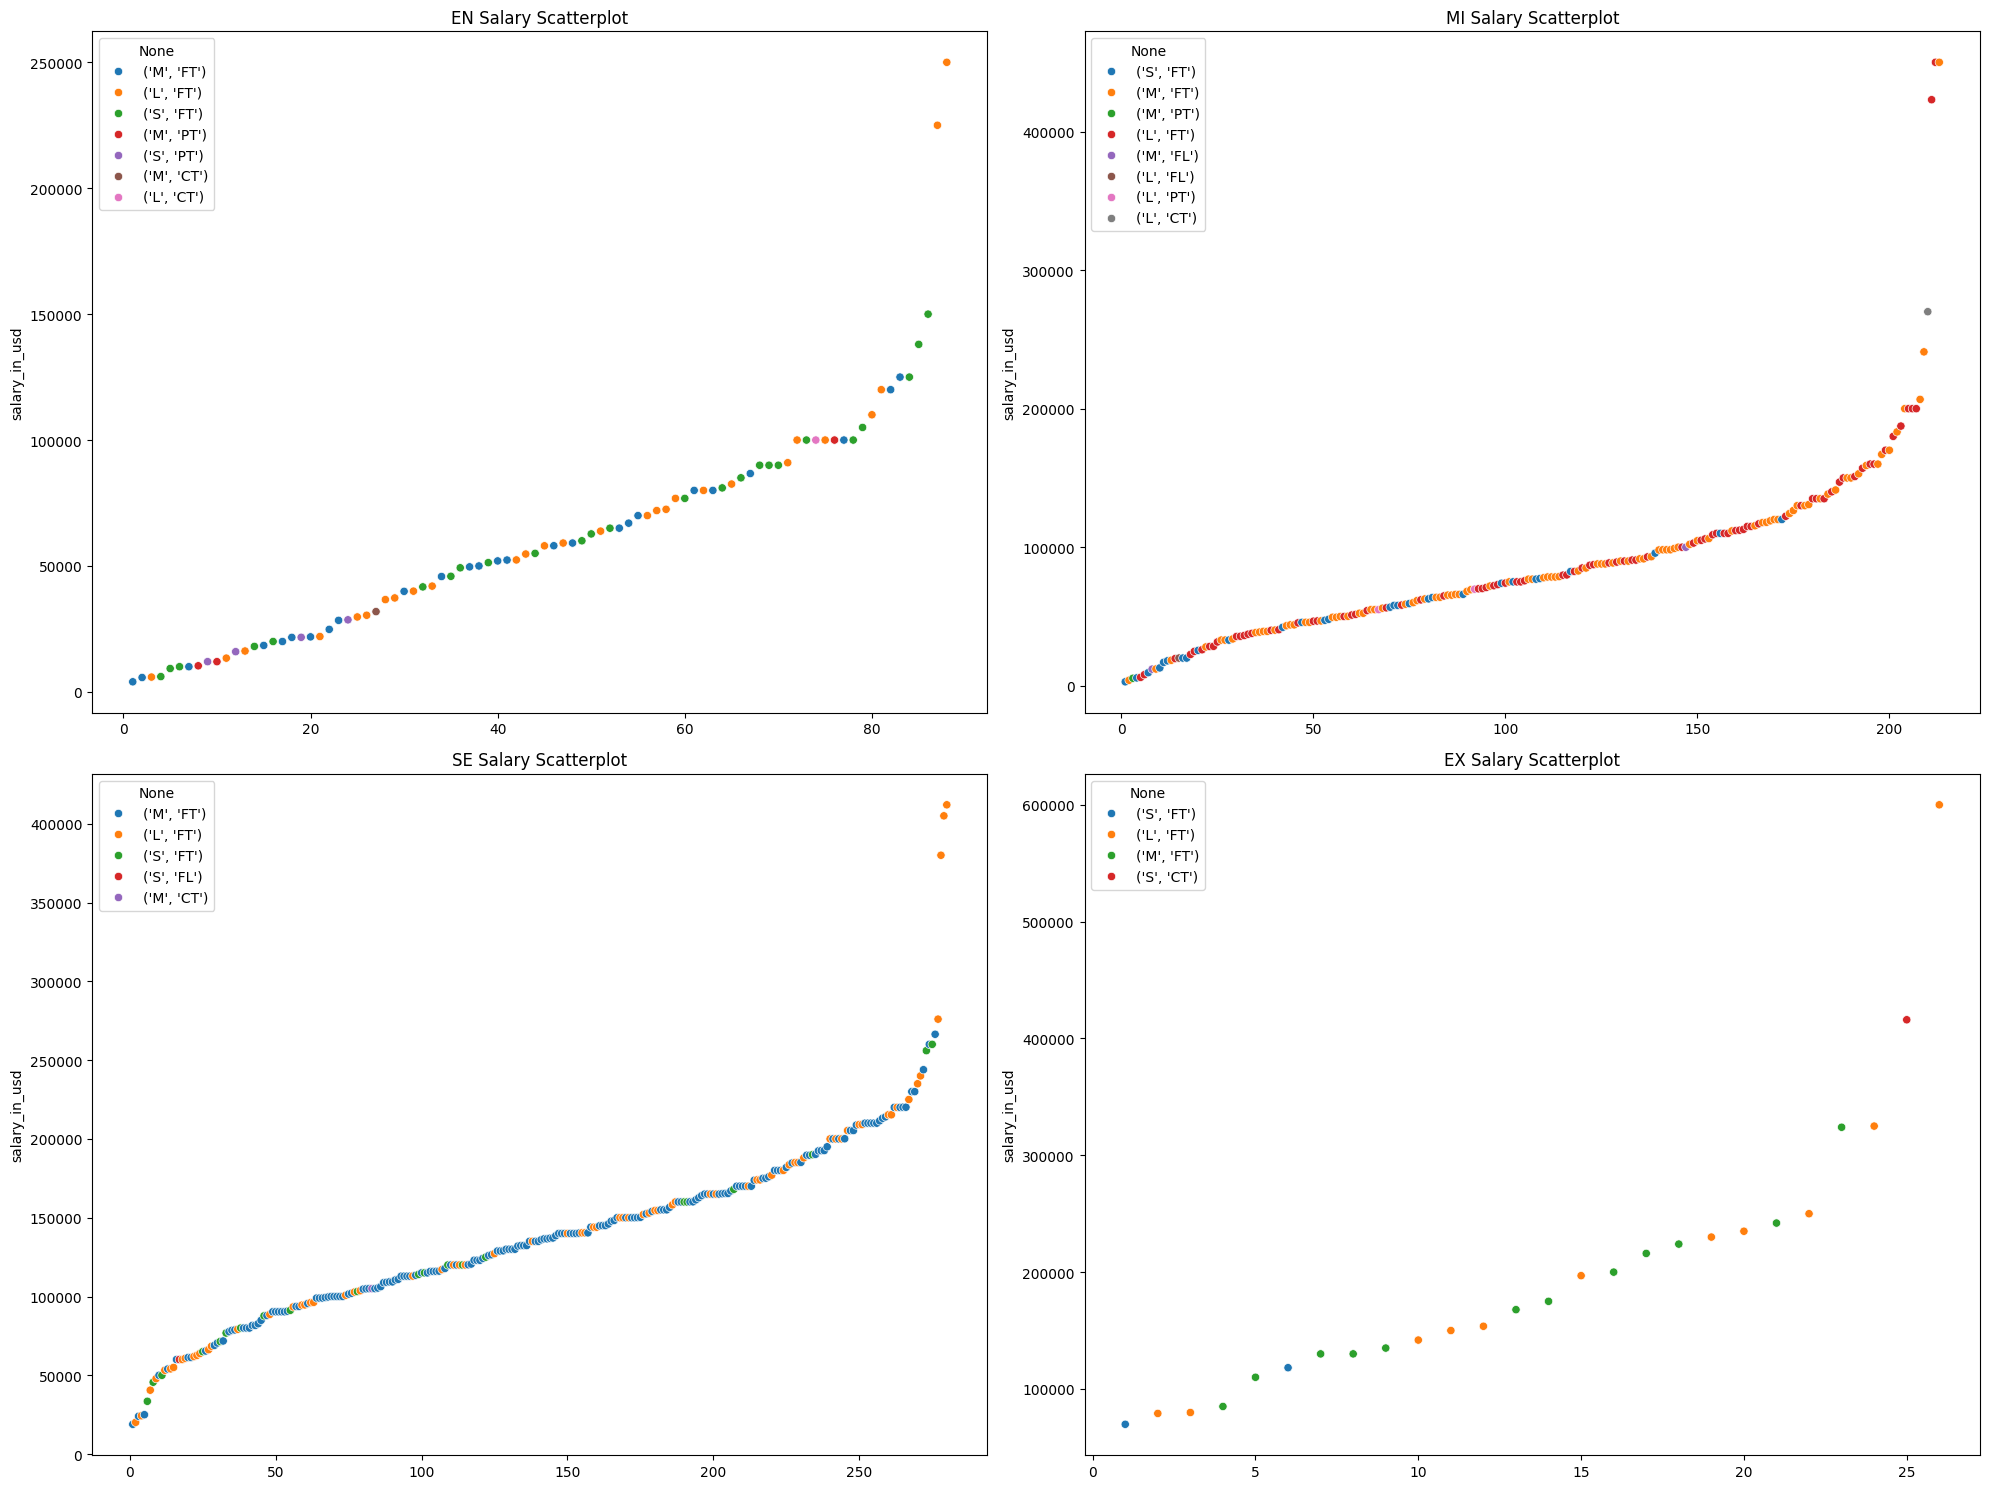

In [395]:
# I want to plot the distribution of salaries for each experience level
# This will give me a good sense of their shape
# Throwing employment type into the hue to get a better sense of where part time and contractors land

fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)


for i, experience in enumerate(["EN", "MI", "SE", "EX"]):
    filtered_by_exp = data[data["experience_level"]==experience]
    y = filtered_by_exp["salary_in_usd"].sort_values()
    x = range(1, len(y)+1)

    row = 1 if i > 1 else 0
    column = i%2

    axs[row, column].set_title(f"{experience}", y=-0.075)
    axs[row, column].ticklabel_format(axis='y', style='plain', scilimits=(0, 0))
    axs[row, column].set_title(f"{experience} Salary Scatterplot")

    sns.scatterplot(data=filtered_by_exp, x=x, y=y, hue=filtered_by_exp.sort_values(by="salary_in_usd")[["company_size", "employment_type"]].apply(tuple, axis=1), ax=axs[row, column])
    
plt.tight_layout()


This looks like it will be normally distributed... Let's make some histograms to confirm

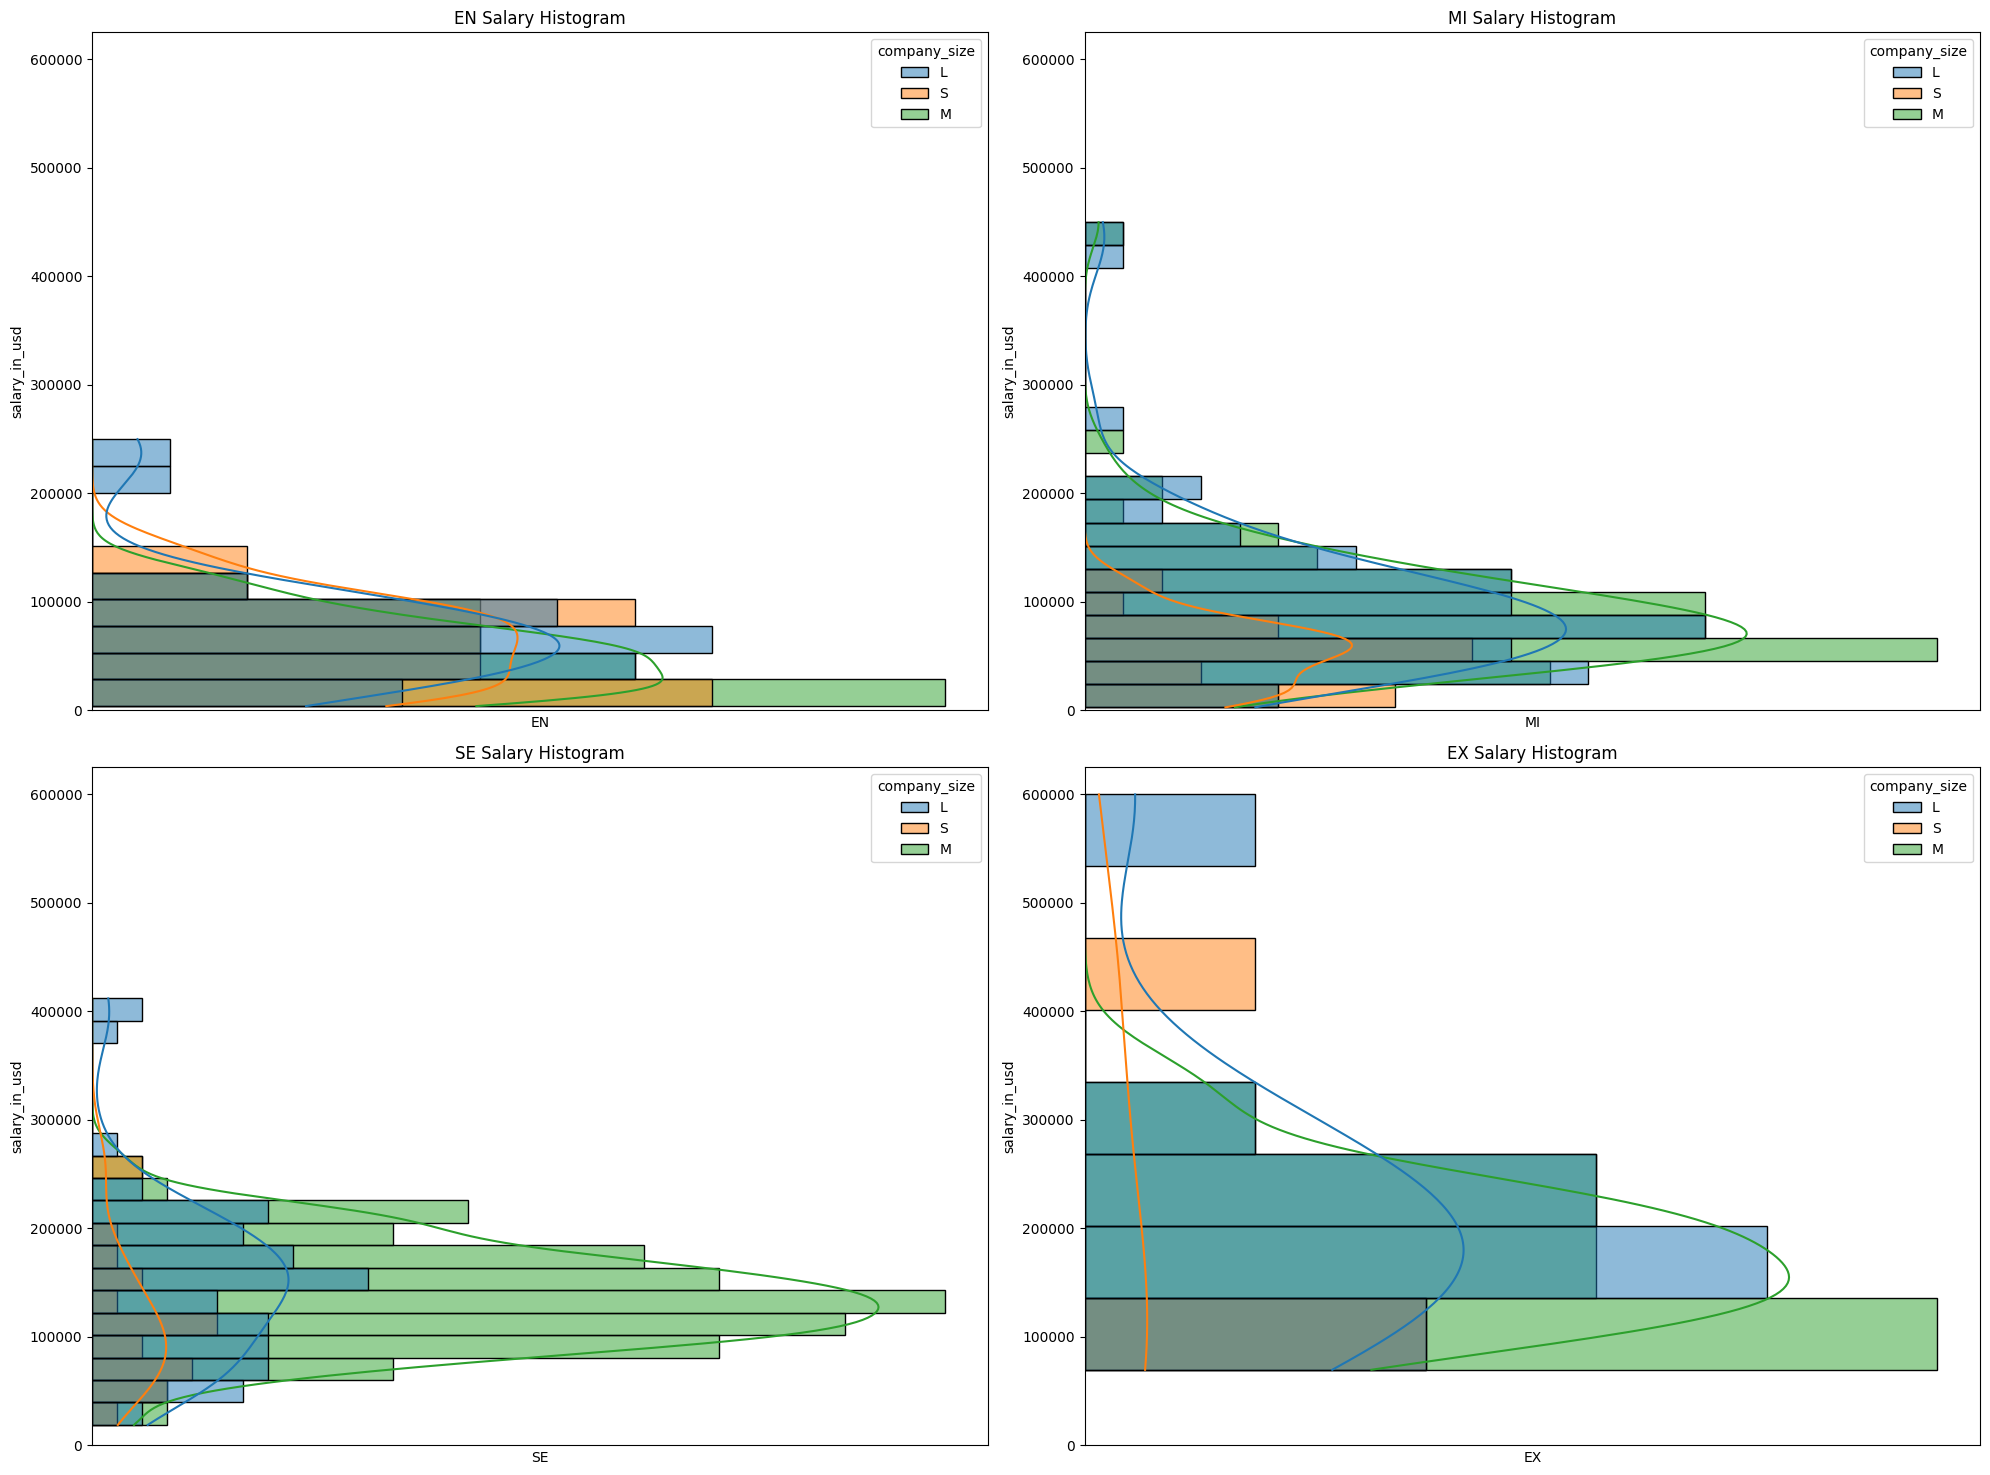

In [396]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)

for i, experience in enumerate(["EN", "MI", "SE", "EX"]):
    filtered_by_exp = data[data["experience_level"]==experience]
    y = filtered_by_exp["salary_in_usd"].sort_values()

    row = 1 if i > 1 else 0
    column = i%2

    axs[row, column].ticklabel_format(axis='y', style='plain', scilimits=(0, 0))
    axs[row, column].set_ylim(0,max(data["salary_in_usd"])+25000)

    sns.histplot(data=filtered_by_exp, y=y, hue=filtered_by_exp.sort_values(by="salary_in_usd")["company_size"],ax=axs[row, column], kde=True)

    #This is to remove the other experience levels from the plot
    axs[row, column].set_xlabel(f"{experience}")
    axs[row, column].set_xticks([])
    axs[row, column].set_title(f"{experience} Salary Histogram")

fig.suptitle("")
plt.tight_layout()

Okay... so there are clearly other confounding variables based on the scatterplot. My hunch is that the big hitter here is company location. Let's run an analysis of these variables by location.

In [397]:
#This was not removing nan values, so I am going to save it as a csv then read it in and drop na

grouped = data[["salary_in_usd", "company_size", "experience_level", "company_location", "employment_type"]].groupby(["experience_level","company_location","company_size"], dropna=True)
grouped["salary_in_usd"].mean().to_csv(r'.\generated_data\mean_salary_by_exp_size_loc.csv')

C:\Users\water\AppData\Local\Temp\ipykernel_29808\570225366.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data[["salary_in_usd", "company_size", "experience_level", "company_location", "employment_type"]].groupby(["experience_level","company_location","company_size"], dropna=True)


In [398]:
mean_salary_by_exp_size_loc = pd.read_csv(r'generated_data\mean_salary_by_exp_size_loc.csv')
mean_salary_by_exp_size_loc.dropna()

,experience_level,company_location,company_size,salary_in_usd
0,MI,DE,L,80982.400000
1,MI,DE,S,42417.500000
2,MI,DE,M,87932.000000
4,MI,JP,S,71691.666667
6,MI,GB,L,82050.166667
...,...,...,...,...
504,EX,ES,L,79833.000000
505,EX,ES,S,69741.000000
522,EX,PL,L,153667.000000
546,EX,RU,L,230000.000000


It seems like there are a lot of locations... let's see how many

In [399]:
len(pd.unique(mean_salary_by_exp_size_loc["company_location"]))

50

Well, fifty countries is a bit more than we care about as a small, US based company that is growing. We want to narrow this search to US based companies. 

## Analyze Companies from US Alone

First, analyze this data, then I would like to redo the previous analysis on the whole dataset with this new information. 

In [400]:
mean_salary_by_exp_size_loc[mean_salary_by_exp_size_loc["company_location"]=="US"].sort_values(by="salary_in_usd")

,experience_level,company_location,company_size,salary_in_usd
13,MI,US,S,69298.333333
314,EN,US,M,79625.000000
313,EN,US,S,84250.000000
312,EN,US,L,112590.909091
14,MI,US,M,130835.105263
163,SE,US,S,132333.333333
12,MI,US,L,133134.883721
164,SE,US,M,143844.456790
162,SE,US,L,181685.574468
464,EX,US,M,192387.500000


This is interesting, not exactly the trend I would expect... I want to boxplot all of this to see what the variance is for US companies.

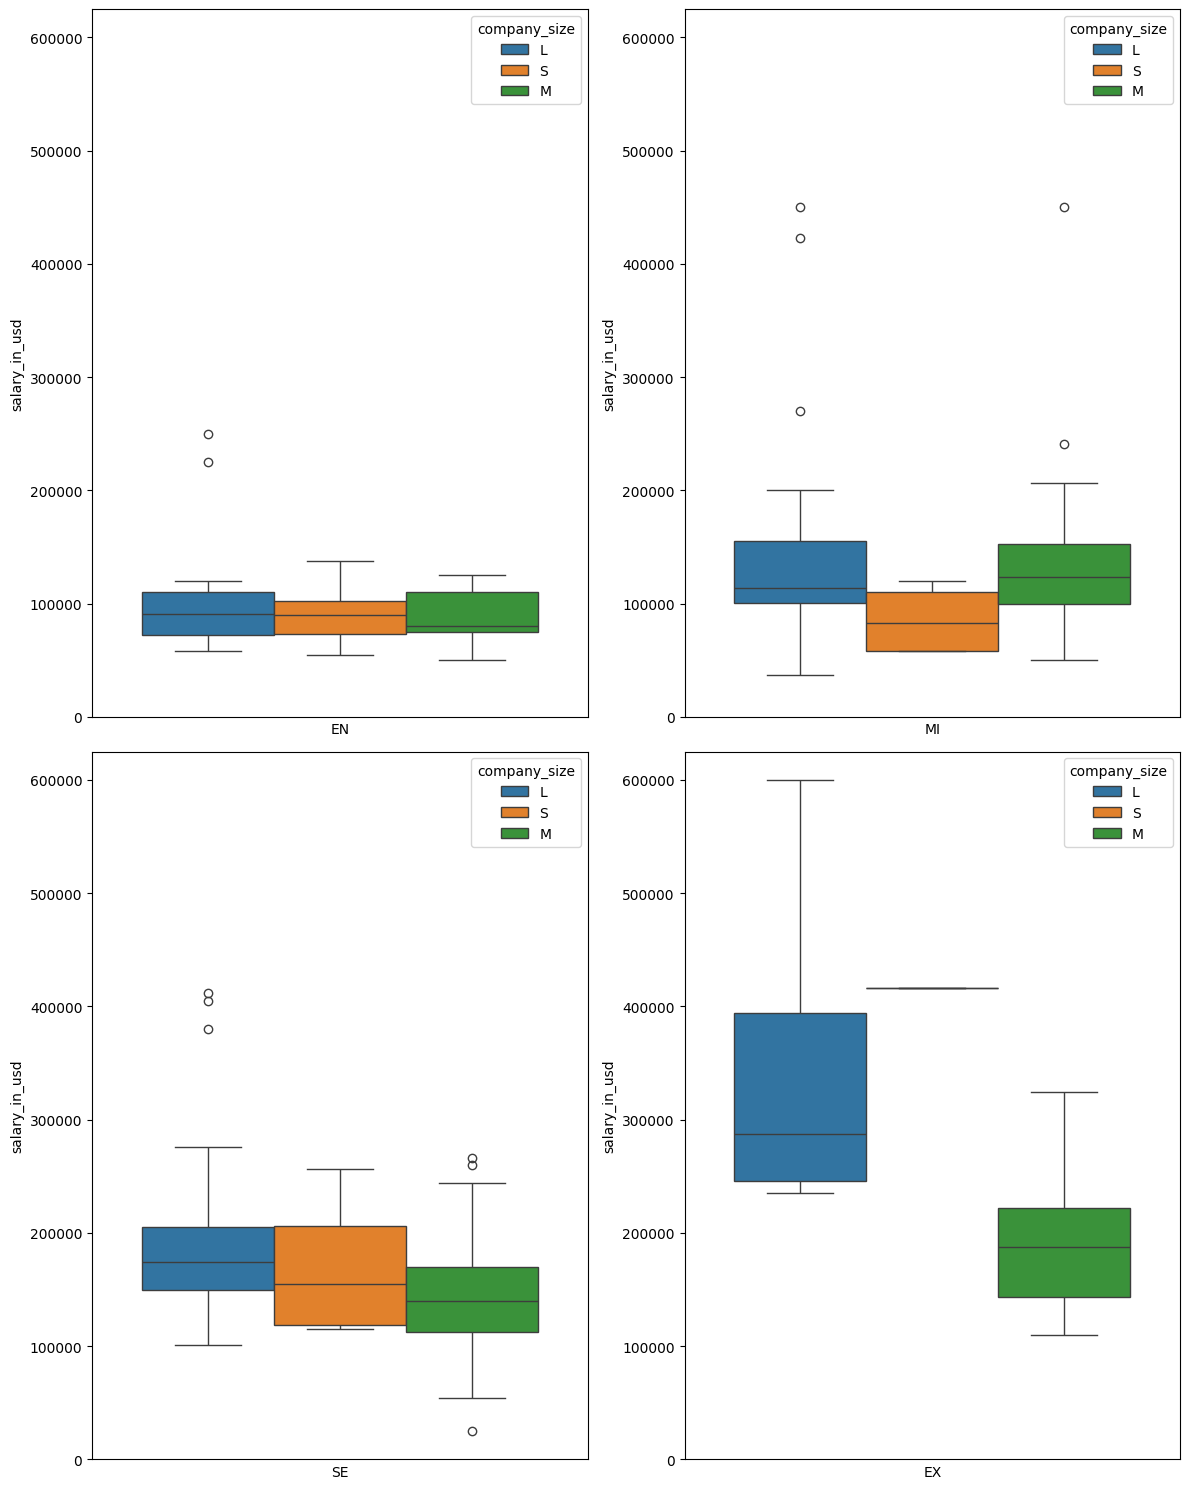

In [401]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(15)
fig.set_figwidth(12)

# Loop through the experience levels and generate plots for each
for i, experience in enumerate(["EN", "MI", "SE", "EX"]):
    #Ensure that only the US is being evaluated
    filtered_by_exp_us = data[(data["experience_level"]==experience)&(data["company_location"]=="US")&(data["employee_residence"]=="US")]
    y = filtered_by_exp_us["salary_in_usd"].sort_values()
    x = filtered_by_exp_us["experience_level"]==experience

    row = 1 if i > 1 else 0
    column = i%2

    axs[row, column].ticklabel_format(axis='y', style='plain', scilimits=(0, 0))
    axs[row, column].set_ylim(0,max(data["salary_in_usd"])+25000)

    sns.boxplot(data=filtered_by_exp_us, x=x, y=y, hue=filtered_by_exp_us.sort_values(by="salary_in_usd")["company_size"], ax=axs[row, column])

    #This is to remove the other experience levels from the plot
    axs[row, column].set_xlabel(f"{experience}")
    axs[row, column].set_xticks([])

    
plt.tight_layout()


## Scatter Plots

Okay, this is kind of predictable. I want to circle back to the plots I made earlier and do them with this smaller dataset.

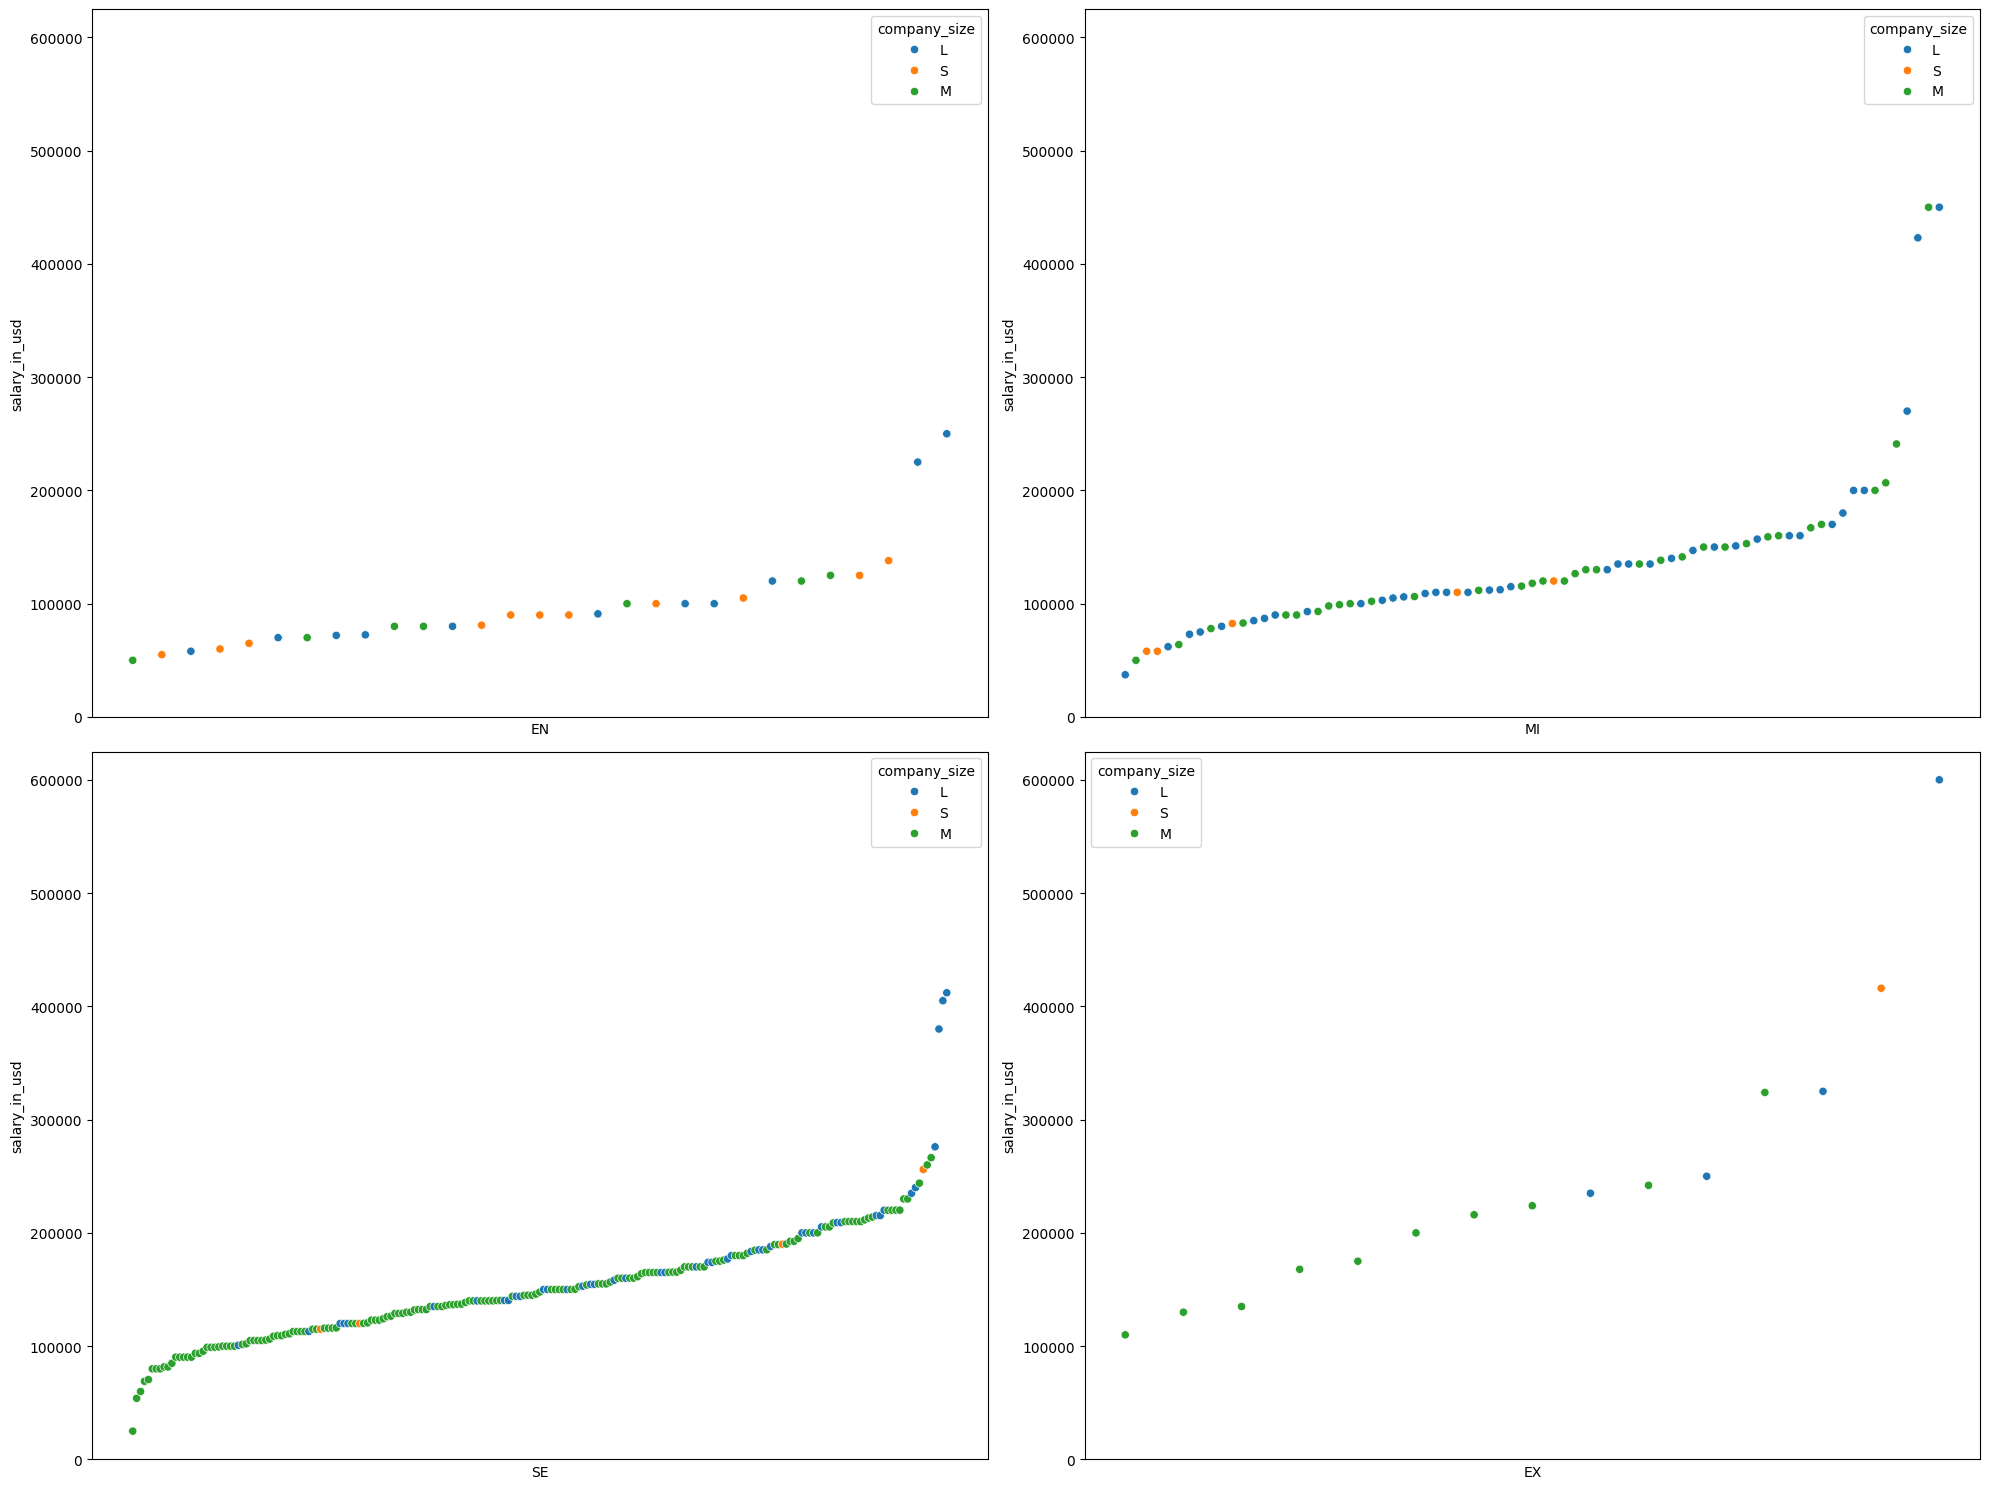

In [402]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)

for i, experience in enumerate(["EN", "MI", "SE", "EX"]):
    filtered_by_exp_us = data[(data["experience_level"]==experience)&(data["company_location"]=="US")&(data["employee_residence"]=="US")]
    y = filtered_by_exp_us["salary_in_usd"].sort_values()
    x = range(1, len(y)+1)

    row = 1 if i > 1 else 0
    column = i%2

    axs[row, column].ticklabel_format(axis='y', style='plain', scilimits=(0, 0))
    axs[row, column].set_ylim(0,max(data["salary_in_usd"])+25000)

    sns.scatterplot(data=filtered_by_exp_us, x=x, y=y, hue=filtered_by_exp_us.sort_values(by="salary_in_usd")["company_size"], ax=axs[row, column])

    #This is to remove the other experience levels from the plot
    axs[row, column].set_xlabel(f"{experience}")
    axs[row, column].set_xticks([])
    
plt.tight_layout()


## Histograms

I want to make a histogram of this... I think it is going to look pretty normally distributed

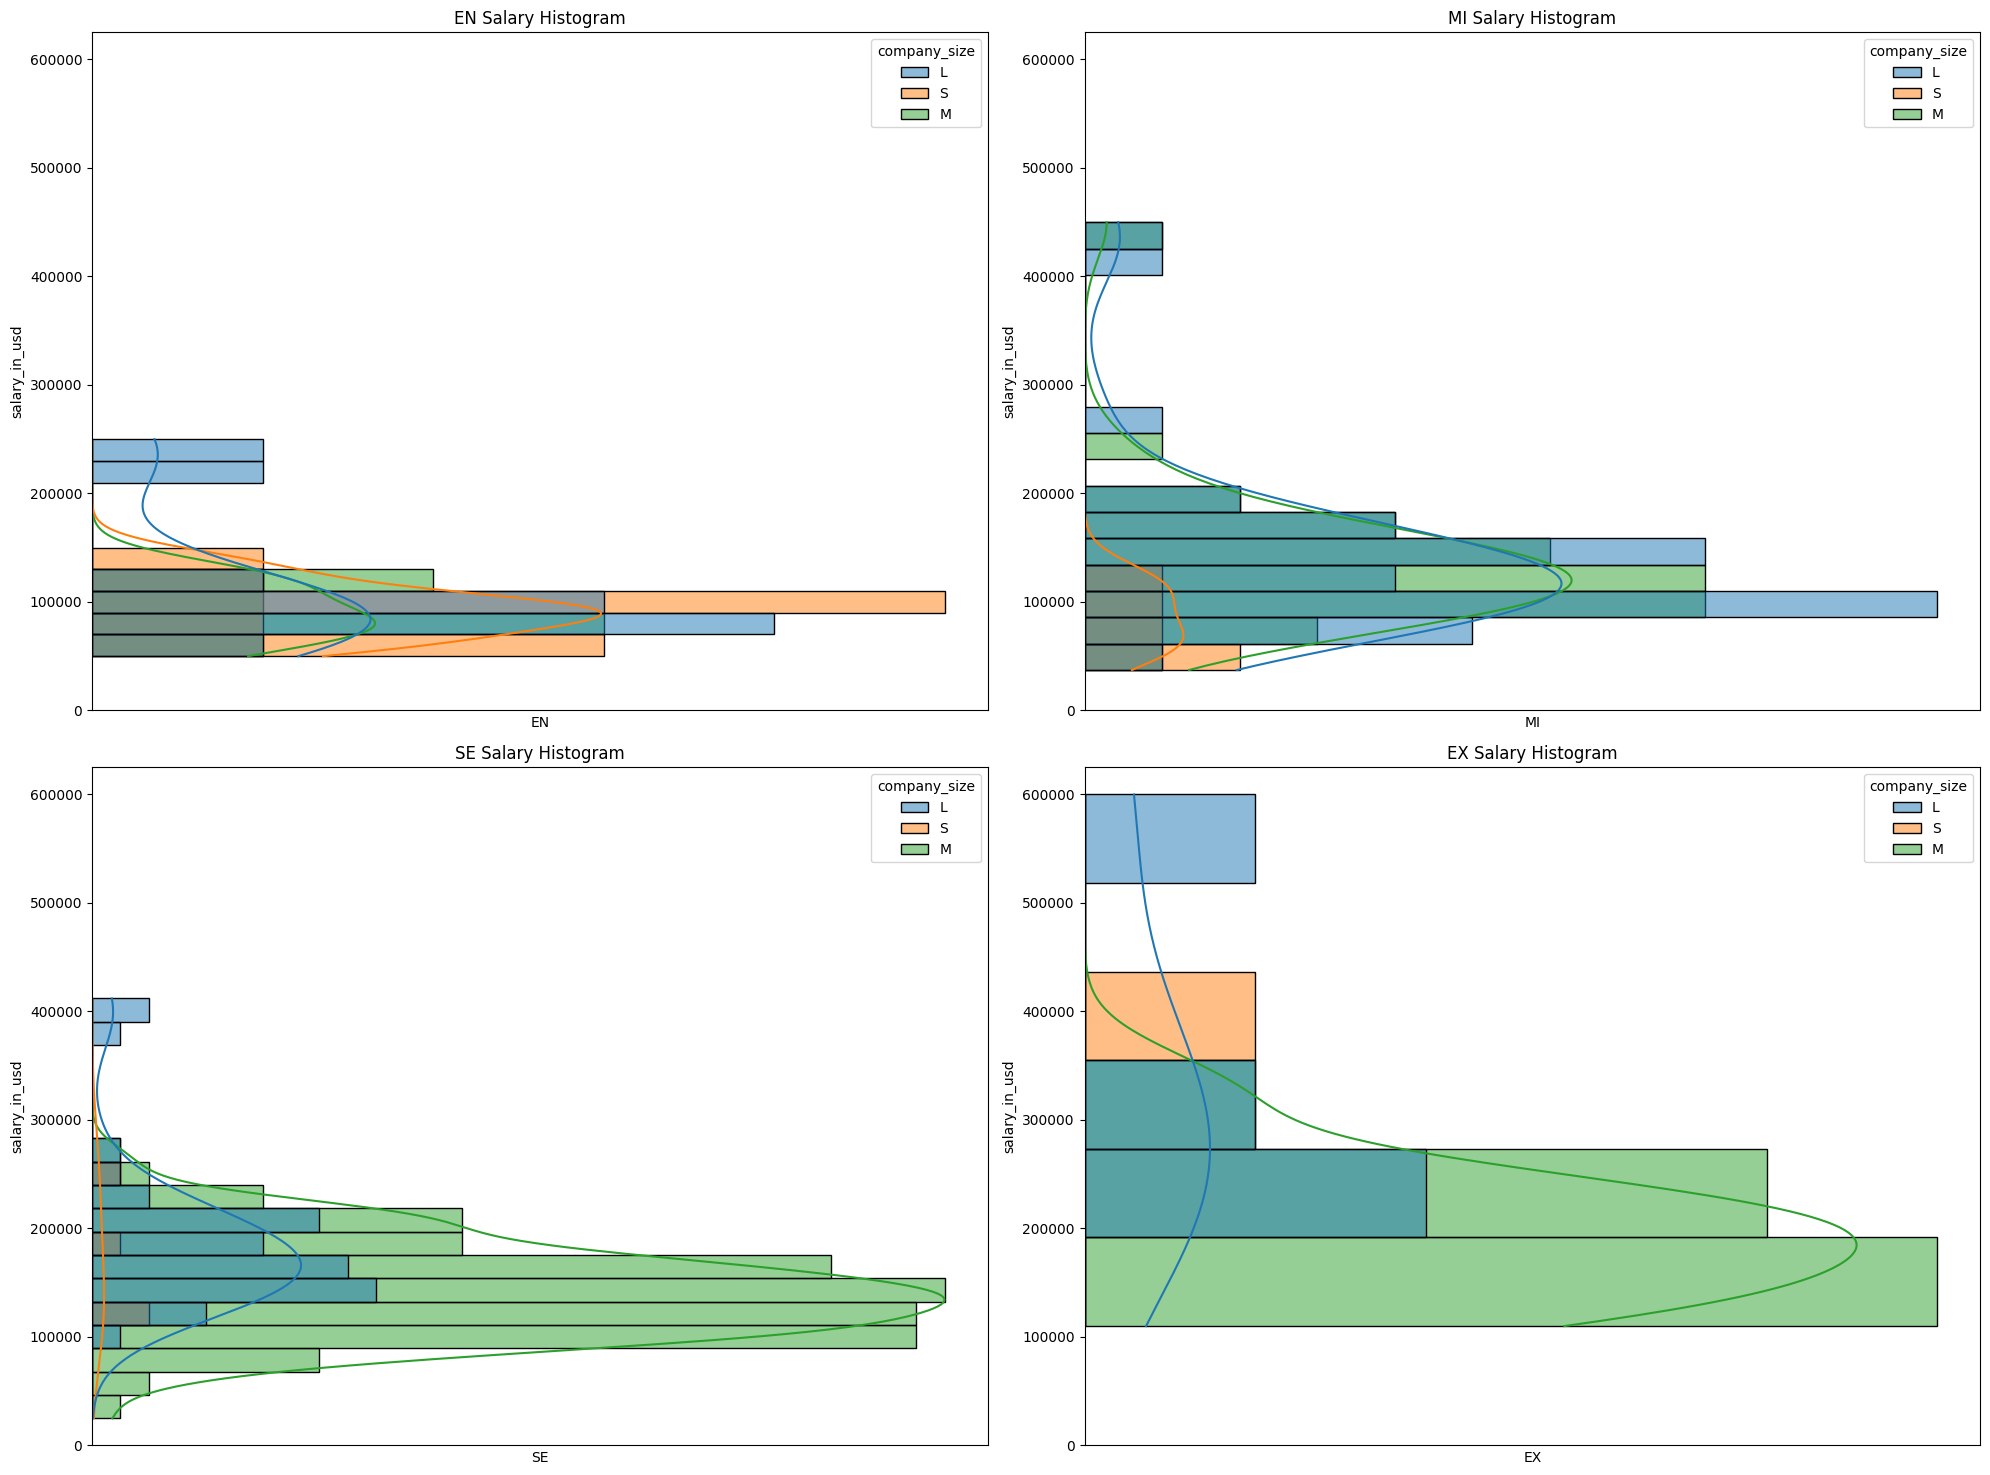

In [403]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)

for i, experience in enumerate(["EN", "MI", "SE", "EX"]):
    filtered_by_exp_us = data[(data["experience_level"]==experience)&(data["company_location"]=="US")&(data["employee_residence"]=="US")]
    y = filtered_by_exp_us["salary_in_usd"].sort_values()

    row = 1 if i > 1 else 0
    column = i%2

    axs[row, column].ticklabel_format(axis='y', style='plain', scilimits=(0, 0))
    axs[row, column].set_ylim(0,max(data["salary_in_usd"])+25000)

    sns.histplot(data=filtered_by_exp_us, y=y, hue=filtered_by_exp_us.sort_values(by="salary_in_usd")["company_size"],ax=axs[row, column], kde=True)

    #This is to remove the other experience levels from the plot
    axs[row, column].set_xlabel(f"{experience}")
    axs[row, column].set_xticks([])
    axs[row, column].set_title(f"{experience} Salary Histogram")

fig.suptitle("")
plt.tight_layout()


Well, turns out this is relatively normally distributed with a bit of skew that is consistent across company size. This is because of a few disproportionaltely high earners.

Let's actually crunch some numbers now...

## IQR Analysis

In [404]:
import numpy as np

# Create an empty list for the IQR analysis
iqr_analysis = []

# Loop through the experience levels and company sizes
for experience in ["EN", "MI", "SE", "EX"]:
    for size in ["S","M","L"]:
        # Filter out the specific experience level and company size for US based companies
        filtered_by_exp_us_size = data[(data["experience_level"]==experience)&(data["company_location"]=="US")&(data["company_size"]==size)]

        # Get the 75th, 50th, and 25th percentile salary ranges
        q75, q50, q25 = np.percentile(filtered_by_exp_us_size["salary_in_usd"], [75, 50, 25])

        # Append the data to the list
        iqr_analysis.append((experience, size, q75, q50, q25, q75-q25, int(np.mean(filtered_by_exp_us_size["salary_in_usd"]))))

# Convert the list to a dataframe
iqr_analysis = pd.DataFrame(iqr_analysis, columns=["experience", "company_size", "75th_percentile", "50th_percentile", "25th_percentile", "iqr", "mean"])

# Print the dataframe
iqr_analysis

,experience,company_size,75th_percentile,50th_percentile,25th_percentile,iqr,mean
0,EN,S,101250.0,90000.0,63750.00,37500.00,84250
1,EN,M,105000.0,80000.0,65000.00,40000.00,79625
2,EN,L,110000.0,91000.0,72250.00,37750.00,112590
3,MI,S,95746.0,58000.0,48000.00,47746.00,69298
4,MI,M,150000.0,120000.0,98275.00,51725.00,130835
5,MI,L,154000.0,112000.0,88500.00,65500.00,133134
6,SE,S,160000.0,120000.0,80000.00,80000.00,132333
7,SE,M,170000.0,140000.0,111418.75,58581.25,143844
8,SE,L,202650.0,170000.0,144000.00,58650.00,181685
9,EX,S,416000.0,416000.0,416000.00,0.00,416000


Let's plot the 75th percentile results...

Text(0.5, 1.0, '75th Percentile Pay by Experience Level')

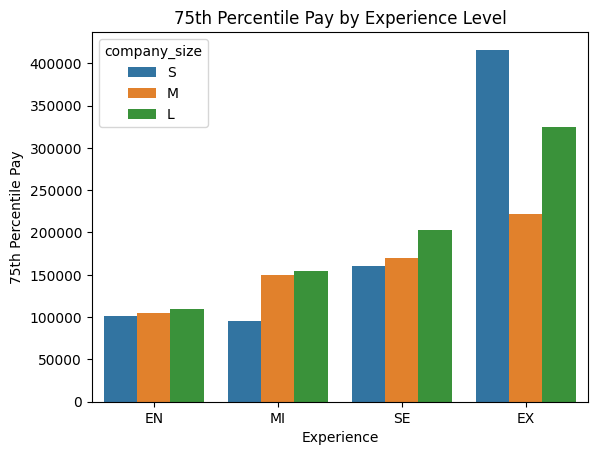

In [405]:
plot = sns.barplot(data=iqr_analysis, x=iqr_analysis["experience"], y=iqr_analysis["75th_percentile"], hue=iqr_analysis["company_size"])
plot.axes.set_xlabel("Experience")
plot.axes.set_ylabel("75th Percentile Pay")
plot.set_title("75th Percentile Pay by Experience Level")

## Predictive Analysis for Expert Salary at Small Companies

We are a small company looking for an experienced candidate, which would likely be a senior or expert candidate. The IQR analysis has revealed a gap in the data for expert data scientists at small companies; there is only one data point and it is an outlier in the data. This is something that I would like to interpolate around.

### Filter the Data

In [406]:
# Do some predictive analysis to determine a reasonable q75, q50, and q25 range for expert data scientists in small companies...

# Get the filtered data

us_salary_size_exp_df = data[(data["company_location"]=="US")&(data["employee_residence"]=="US")][["salary_in_usd", "company_size", "experience_level"]]
us_salary_size_exp_df

,salary_in_usd,company_size,experience_level
4,150000,L,SE
5,72000,L,EN
6,190000,S,SE
8,135000,L,MI
13,87000,L,MI
...,...,...,...
599,130000,M,MI
602,154000,M,SE
603,126000,M,SE
604,129000,M,SE


In [407]:
# I am going to want to predict the salary of an expert at a small company using the existing data
# I will make the decision to remove the outlying data point, as I don't want it to influence the prediction

us_salary_size_exp_df = us_salary_size_exp_df.drop(us_salary_size_exp_df[(data["experience_level"]=="EX")&(data["company_size"]=="S")].index)
us_salary_size_exp_df

C:\Users\water\AppData\Local\Temp\ipykernel_29808\1393924064.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  us_salary_size_exp_df = us_salary_size_exp_df.drop(us_salary_size_exp_df[(data["experience_level"]=="EX")&(data["company_size"]=="S")].index)


,salary_in_usd,company_size,experience_level
4,150000,L,SE
5,72000,L,EN
6,190000,S,SE
8,135000,L,MI
13,87000,L,MI
...,...,...,...
599,130000,M,MI
602,154000,M,SE
603,126000,M,SE
604,129000,M,SE


### Build an Ordinary Least Squares Model

OLS Implementation source:

https://stackoverflow.com/questions/34007308/linear-regression-analysis-with-string-categorical-features-variables

In [408]:
# install statsmodels if not already installed
!pip install statsmodels

In [409]:
import statsmodels.api as sm

# define the x and y variables
X = np.asarray(pd.get_dummies(us_salary_size_exp_df[["experience_level", "company_size"]], dtype=float))
y = us_salary_size_exp_df["salary_in_usd"]

# create the model
model = sm.OLS(y, X)

#get the results
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     15.73
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           7.35e-14
Time:                        14:28:17   Log-Likelihood:                -4085.8
No. Observations:                 329   AIC:                             8184.
Df Residuals:                     323   BIC:                             8206.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           4.06e+04   6958.138      5.835      0.0

The regression results aren't great... at all...

Just out of curiosity, I want to try to run a prediction anyway.

In [410]:
# Make a salary prediction based on a small company with an expert data scientist
ex_s = np.array([0, 0, 0, 1, 0, 1, 0])
prediction = results.predict(ex_s)
prediction[0]

np.float64(227924.12761784007)

Okay, well, that is a surprisingly resonable prediction given model results. I also want to give a multiple regression model a shot. This is a tricky problem because there are several categorical values affecting the y-value.

### Build a Linear Regression Model

Linear regression source:

https://scikit-learn.org/1.6/modules/generated/sklearn.linear_model.LinearRegression.html

In [411]:
!pip install scikit-learn


In [412]:
from sklearn.linear_model import LinearRegression

In [413]:
# define the x and y variables
X = np.asarray(pd.get_dummies(us_salary_size_exp_df[["experience_level", "company_size"]], dtype=float))
y = np.asarray(us_salary_size_exp_df["salary_in_usd"])

# create the model
model = LinearRegression()

model.fit(X, y)

print(model.coef_, model.intercept_)


[-26329.90498884   1742.39854655 -59146.85460494  83734.36104723
  24132.93877289 -11988.95191615 -12143.98685674] 156178.71848676482


In [414]:
# Make a salary prediction based on a small company with an expert data scientist
ex_s = np.array([[0, 0, 0, 1, 0, 1, 0]])
prediction = model.predict(ex_s)
prediction[0]

np.float64(227924.12761784001)

Hmmm... The linear regression model gave me the same prediction as the oridnary least squares model. This makes me feel a bit better. With that, we proceed onward...

## Incorporating the predicted value into the data set

In [415]:
expert_small_salary_df = pd.DataFrame({"salary_in_usd":[int(prediction[0])],"experience_level":["EX"], "company_size":["S"]})

corrected_df=pd.concat([us_salary_size_exp_df, expert_small_salary_df], ignore_index=True)

corrected_df

,salary_in_usd,company_size,experience_level
0,150000,L,SE
1,72000,L,EN
2,190000,S,SE
3,135000,L,MI
4,87000,L,MI
...,...,...,...
325,154000,M,SE
326,126000,M,SE
327,129000,M,SE
328,150000,M,SE


In [416]:
# Create an empty list for the IQR analysis
iqr_analysis_corrected = []

# Create a list for salary ranges based on the computed IQR's 
salary_ranges = []

# Loop through the experience levels and company sizes
for experience in ["EN", "MI", "SE", "EX"]:
    for size in ["S","M","L"]:
        # Filter out the specific experience level and company size for US based companies
        filtered_by_exp_us_size_corrected = corrected_df[(corrected_df["experience_level"]==experience)&(corrected_df["company_size"]==size)]

        # Get the 75th, 50th, and 25th percentile salary ranges
        q80, q75, q65, q50, q25 = np.percentile(filtered_by_exp_us_size_corrected["salary_in_usd"], [80, 75, 65, 50, 25])

        # Append the data to the list
        iqr_analysis_corrected.append(
                (
                experience, 
                size, 
                q75, 
                q50, 
                q25, 
                q75-q25, 
                int(np.mean(filtered_by_exp_us_size_corrected["salary_in_usd"])), 
                int(np.std(filtered_by_exp_us_size_corrected["salary_in_usd"]))
                )
            )
        

        # Append the min and max for the salary range to the salary range list
        salary_ranges.append((experience, size, q80, q65))

# Convert the list to a dataframe
iqr_analysis_corrected_df = pd.DataFrame(iqr_analysis_corrected, columns=["experience", "company_size", "75th_percentile", "50th_percentile", "25th_percentile", "iqr", "mean", "stdev"])

# Convert the salary ranges to a dataframe
salary_ranges_df =  pd.DataFrame(salary_ranges, columns=["experience", "company_size", "80th_percentile", "65th_percentile"])

In [417]:
# Print the iqr dataframe
iqr_analysis_corrected_df

,experience,company_size,75th_percentile,50th_percentile,25th_percentile,iqr,mean,stdev
0,EN,S,102500.0,90000.0,73000.00,29500.00,90818,24638
1,EN,M,110000.0,80000.0,75000.00,35000.00,89285,25132
2,EN,L,110000.0,91000.0,72250.00,37750.00,112590,61397
3,MI,S,110000.0,82500.0,58000.00,52000.00,85700,25736
4,MI,M,152250.0,123250.0,99325.00,52925.00,136662,67655
5,MI,L,155500.0,113650.0,100750.00,54750.00,141250,81910
6,SE,S,206500.0,155000.0,118750.00,87750.00,170250,57707
7,SE,M,170000.0,140000.0,112406.25,57593.75,143767,43361
8,SE,L,205300.0,174000.0,150000.00,55300.00,187037,67157
9,EX,S,227924.0,227924.0,227924.00,0.00,227924,0


In [418]:
# Print the salary range dataframe
salary_ranges_df

,experience,company_size,80th_percentile,65th_percentile
0,EN,S,105000.0,95000.0
1,EN,M,116000.0,98000.0
2,EN,L,120000.0,100000.0
3,MI,S,112000.0,99000.0
4,MI,M,159400.0,139677.5
5,MI,L,160000.0,140350.0
6,SE,S,216400.0,186500.0
7,SE,M,180000.0,157790.0
8,SE,L,210340.0,186800.0
9,EX,S,227924.0,227924.0


Text(0.5, 1.0, '75th Percentile Pay by Experience Level')

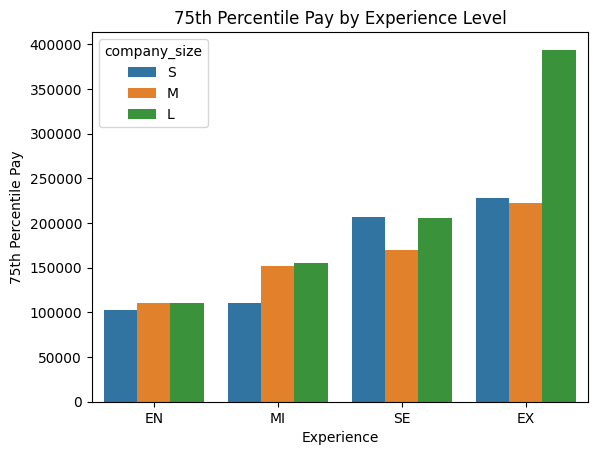

In [419]:
plot = sns.barplot(data=iqr_analysis_corrected_df, x=iqr_analysis_corrected_df["experience"], y=iqr_analysis_corrected_df["75th_percentile"], hue=iqr_analysis_corrected_df["company_size"])
plot.axes.set_xlabel("Experience")
plot.axes.set_ylabel("75th Percentile Pay")
plot.set_title("75th Percentile Pay by Experience Level")

The expert level position still only has one value, which we are assuming is the 75th percentile salary. If we assume the distribution is normal, we can compute what the 80th and 65th percentile salaries would be. 

In [420]:
from scipy.stats import norm

# Compute mean assuming a normal distribution, given a percentile, salary, and standard deviation
def compute_mean(percentile, salary, stdev):
    z_score = norm.ppf(percentile)
    mean = salary - z_score*stdev
    return mean

#Estimate the standard deviation using the mean stdev for all experience levels at small companies
stdev = iqr_analysis_corrected_df[iqr_analysis_corrected_df["company_size"]=="S"]["stdev"].mean()

# Compute the 80th and 65th percentiles using the computed mean and standard deviation
p_80 = norm.ppf(0.8, loc=compute_mean(0.75, 227924, stdev), scale=stdev)
p_65 = norm.ppf(0.65, loc=compute_mean(0.75, 227924, stdev), scale=stdev)

print(p_80, p_65)

232439.93446371285 220110.5736597134


## Remote Worker Analysis

The candidate can work remotely from outside the country, so I want to ensure I capture this case in my analysis. Technically, this is a subset of the prior analysis, but the data might be interesting.

In [421]:
# Filter by US companies, remote jobs, and residences outside of the US

remote_us_non_residence = data[(data["remote_ratio"]==100)&(data["company_location"]=="US")&(data["employee_residence"]!="US")]
remote_us_non_residence

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
19,2020,MI,FT,Lead Data Engineer,56000,USD,56000,PT,100,US,M
32,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
40,2020,MI,FT,Data Scientist,45760,USD,45760,PH,100,US,S
54,2020,SE,FL,Computer Vision Engineer,60000,USD,60000,RU,100,US,S
61,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M
73,2021,EX,FT,BI Data Analyst,150000,USD,150000,IN,100,US,L
89,2021,SE,FT,Data Analyst,80000,USD,80000,BG,100,US,S
96,2021,EN,PT,AI Scientist,12000,USD,12000,BR,100,US,S
99,2021,MI,FT,Computer Vision Software Engineer,81000,EUR,95746,DE,100,US,S
113,2021,EN,PT,AI Scientist,12000,USD,12000,PK,100,US,M


There are only a few of this category of candidate... I'll do a quick analysis of the mean salary range for each experience level, but I don't think this is a feasible option.

In [422]:
# Create an empty list for the IQR analysis
mean_analysis = []

# Loop through the experience levels and company sizes
for experience in ["EN", "MI", "SE", "EX"]:
    for size in ["S","M","L"]:
        # Filter out the specific experience level and company size for US based companies
        remote_us_non_residence_by_exp_size = data[(data["remote_ratio"]==100)&(data["company_location"]=="US")&(data["employee_residence"]!="US")&(data["experience_level"]==experience)&(data["company_size"]==size)]

        # Append the data to the list
        mean_analysis.append((experience, size, np.mean(remote_us_non_residence_by_exp_size["salary_in_usd"])))

# Convert the list to a dataframe
mean_analysis = pd.DataFrame(mean_analysis, columns=["experience", "company_size", "mean"])

# Print the dataframe
mean_analysis

,experience,company_size,mean
0,EN,S,12000.00
1,EN,M,12000.00
2,EN,L,NaN
3,MI,S,48796.25
4,MI,M,81300.00
5,MI,L,137500.00
6,SE,S,87500.00
7,SE,M,150000.00
8,SE,L,68428.00
9,EX,S,NaN


Text(0.5, 1.0, 'Mean Pay by Experience Level for Remote Workers at US Companies')

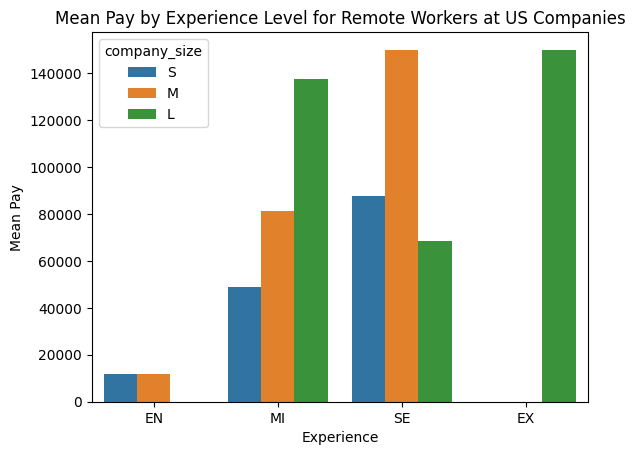

In [423]:
plot = sns.barplot(data=mean_analysis, x=mean_analysis["experience"], y=mean_analysis["mean"], hue=mean_analysis["company_size"])
plot.axes.set_xlabel("Experience")
plot.axes.set_ylabel("Mean Pay")
plot.set_title("Mean Pay by Experience Level for Remote Workers at US Companies")